In [227]:
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Research Question
Is there a relationship in how happy a country is and the music the people of this country listen to?

### Introduction
Attempting to understand what makes a country "happy" is often attributable to freedom, social support, life expectancy, health, among others; however, the music the people of said country listen to is often not one of these factors given its weak relationship and versatility across the world. Although our research question does not attempt to attribute the type of music a country listens to to its happiness index score (it would be difficult to establish given reverse causality), we are more interested in observing what trends are apparent in some of the happiest and less happiest countries with respect to the music they listen to. 

We will be using the happiness rank and happiness score for the year 2017, provided by a dataset on Kaggle by Sustainable Development Solutions Network. As for the music, we will be using two distinct spotify datasets for the year 2017 from Kaggle. We will be using features of one of these datasets, such as genre and danceability score, in order to draw comparisons with our happiness scores. 

In [228]:
happy2015=pd.read_csv("2015.csv")
happy2016=pd.read_csv("2016.csv")
happy2017=pd.read_csv("2017.csv")
happy2018=pd.read_csv("2018.csv")
happy2019=pd.read_csv("2019.csv")

In [229]:
#allspotifydata=pd.read_csv("data 2.csv")
#countries=pd.unique(allspotifydata['Region'])

#allcountries=[]
#for country in countries:
    #allcountries.append(allspotifydata[allspotifydata['Region']==country])

#count=1
#for df in allcountries:
    #name='country'+str(count)+'.csv'
    #df.to_csv(r'C:\Users\Eva\Downloads\country'+str(count)+'.csv')
    #count=count+1

In [230]:
argentina=pd.read_csv("argentina.csv")
australia=pd.read_csv("australia.csv")
austria=pd.read_csv("austria.csv")
belgium=pd.read_csv("belgium.csv")
bolivia=pd.read_csv("bolivia.csv")
brazil=pd.read_csv("brazil.csv")
canada=pd.read_csv("canada.csv")
chile=pd.read_csv("chile.csv")
colombia=pd.read_csv("colombia.csv")
costarica=pd.read_csv("costarica.csv")
czechrepublic=pd.read_csv("czechrepublic.csv")
denmark=pd.read_csv("denmark.csv")
dominicanrepublic=pd.read_csv("dominicanrepublic.csv")
ecuador=pd.read_csv("ecuador.csv")
elsalvador=pd.read_csv('elsalvador.csv')
estonia=pd.read_csv('estonia.csv')
finland=pd.read_csv("finland.csv")
france=pd.read_csv("france.csv")
germany=pd.read_csv("germany.csv")
Global=pd.read_csv('global.csv')
greece=pd.read_csv('greece.csv')
guatemala=pd.read_csv("guatemala.csv")
honduras=pd.read_csv("honduras.csv")
hongkong=pd.read_csv("hongkong.csv")
hungary=pd.read_csv("hungary.csv")
iceland=pd.read_csv("iceland.csv")
indonesia=pd.read_csv("indonesia.csv")
ireland=pd.read_csv("ireland.csv")
italy=pd.read_csv("italy.csv")
japan=pd.read_csv("japan.csv")
latvia=pd.read_csv("latvia.csv")
lithuania=pd.read_csv("lithuania.csv")
luxembourg=pd.read_csv("luxembourg.csv")
malaysia=pd.read_csv("malaysia.csv")
mexico=pd.read_csv("mexico.csv")
netherlands=pd.read_csv("netherlands.csv")
newzealand=pd.read_csv("newzealand.csv")
norway=pd.read_csv("norway.csv")
panama=pd.read_csv("panama.csv")
paraguay=pd.read_csv("paraguay.csv")
peru=pd.read_csv("peru.csv")
philippines=pd.read_csv("philippines.csv")
poland=pd.read_csv("poland.csv")
portugal=pd.read_csv("portugal.csv")
singapore=pd.read_csv("singapore.csv")
slovakia=pd.read_csv("slovakia.csv")
spain=pd.read_csv("spain.csv")
sweden=pd.read_csv("sweden.csv")
switzerland=pd.read_csv("switzerland.csv")
taiwan=pd.read_csv("taiwan.csv")
turkey=pd.read_csv("turkey.csv")
unitedkingdom=pd.read_csv("unitedkingdom.csv")
unitedstates=pd.read_csv("unitedstates.csv")
uruguay=pd.read_csv("uruguay.csv")

In [231]:
allspotifycountries=["argentina", "australia", "austria", "belgium", "brazil","bolivia", "canada", "chile", "colombia", "costarica", "czechrepublic","denmark", "dominicanrepublic", "estonia", "elsalvador", "Global","greece", "ecuador", "finland", "france", "germany", "guatemala", "honduras", "hongkong", "hungary", "iceland", "indonesia", "ireland", "italy", "japan", "latvia", "lithuania", "luxembourg", "malaysia", "mexico", "netherlands", "newzealand", "norway", "panama", "paraguay", "peru", "philippines", "poland", "portugal", "singapore", "slovakia", "spain", "sweden", "switzerland", "taiwan", "turkey", "unitedkingdom", "unitedstates", "uruguay"]

#list for countries that are found in both datsets.
allcountries=[]
for row in range(len(happy2017)):
    country=happy2017.loc[row,'Country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allspotifycountries:
        allcountries.append(country)      

#Happy Index from 2017 with only 'Country', 'Happiness.Rank', and 'Happiness.Score' columns and only with countries that have their own dataset for spotify daily.        
happy=pd.DataFrame({'Country':[],'Happiness.Rank':[],'Happiness.Score':[]})
for row in range(len(happy2017)):
    country=happy2017.loc[row,'Country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allcountries:       
        newrow={'Country':happy2017.loc[row,'Country'],'Happiness.Rank':happy2017.loc[row,'Happiness.Rank'],'Happiness.Score':happy2017.loc[row,'Happiness.Score']}
        happy=happy.append(newrow, ignore_index=True)

        
#Noticed that Taiwan is referred to as Taiwan Province of China on Happy Index.
newrow={'Country':happy2017.loc[32,'Country'],'Happiness.Rank':happy2017.loc[32,'Happiness.Rank'],'Happiness.Score':happy2017.loc[32,'Happiness.Score']}
happy=happy.append(newrow, ignore_index=True)

#allspotifydata[allspotifydata['Region']==country])
allcountries.append("Taiwan")
print('These are the spotify datsets we should use: ' + str(allcountries))
print(happy)

These are the spotify datsets we should use: ['norway', 'denmark', 'iceland', 'switzerland', 'finland', 'netherlands', 'canada', 'newzealand', 'sweden', 'australia', 'costarica', 'austria', 'unitedstates', 'ireland', 'germany', 'belgium', 'luxembourg', 'unitedkingdom', 'chile', 'brazil', 'czechrepublic', 'argentina', 'mexico', 'singapore', 'uruguay', 'guatemala', 'panama', 'france', 'spain', 'colombia', 'slovakia', 'malaysia', 'ecuador', 'elsalvador', 'poland', 'italy', 'japan', 'lithuania', 'latvia', 'bolivia', 'peru', 'estonia', 'turkey', 'paraguay', 'philippines', 'hungary', 'indonesia', 'dominicanrepublic', 'greece', 'portugal', 'honduras', 'Taiwan']
                     Country  Happiness.Rank  Happiness.Score
0                     Norway             1.0            7.537
1                    Denmark             2.0            7.522
2                    Iceland             3.0            7.504
3                Switzerland             4.0            7.494
4                    Finlan

In [232]:
#we're not using this function yet
def firstfifty_fake(dataframe):
    """
    This will get the first 50 observations in every 200 observations.
    there are 200 observations in 1 day, and there are 365 days.
    """
    acc=0
    new=[]
    for song in dataframe:
        print(song)
        new_songs = dataframe.iloc[acc:acc+50]
        acc+=200
        dataframe =new_songs
        new.append(new_songs)
        return dataframe

#### Brief Explanation of Code Above
This is a similar function to the one encountered below; however, this does not quite fulfill our desire goal, so we have just lef it for future use.

In [233]:
#adding the countries we will work with based on the subset below in allcountries. We will use this to subset the first 50 songs below
countries_to_subset = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras, taiwan]

countries_to_subset_str = ['norway', 'denmark', 'iceland', 'switzerland', 'finland', 'netherlands', 
                           'canada', 'newzealand', 'sweden', 'australia', 'costarica', 'austria', 
                           'unitedstates', 'ireland', 'germany', 'belgium', 'luxembourg', 'unitedkingdom', 
                           'chile', 'brazil', 'czechrepublic', 'argentina', 'mexico', 'singapore', 
                           'uruguay', 'guatemala', 'panama', 'france', 'spain', 'colombia', 'slovakia', 
                           'malaysia', 'ecuador', 'elsalvador', 'poland', 'italy', 'japan', 'lithuania',
                           'latvia', 'bolivia', 'peru', 'estonia', 'turkey', 'paraguay', 'philippines', 
                           'hungary', 'indonesia', 'dominicanrepublic', 'greece', 'portugal', 'honduras', 'Taiwan']

#### Brief Explanation of Code Above
This part is collecting a list of all the "usable" countries' dataframes, as determined by the subset above in which happiness rank is compared to the spotify dataset. It collects these dataframes to then use them in a for-loop below. We are also taking a list of the selfsame countries in string form to work with their names for purposes later in our code

In [234]:
#fake_norway = norway.groupby(norway.index//200).head(50)
def first_fifty(dataframe):
    """
    This will get the first 50 observations in every 200 observations.
    There should only be 200 observations in 1 day, and there are 365 days per country in this data,
    which is the purpose of this function.
    
    Parameter dataframe: this is the countrydatafram which we will work with.
    Precondition: a pandas dataframe object
    """
    dataframe = dataframe.groupby(dataframe.index//200).head(50) 
#     dataframe = subset_data.copy()
#     return dataframe

In [235]:
for file in countries_to_subset: 
    first_fifty(file)

#### Brief Explanation of Code Above
A function meant to subset the first fifty observations of every 200 songs in our dataset as otherwise we would be working with 200 songs x 265 days, which is excessive for our analysis – and memory – purposes.

#### Brief Explanation of Code Above
This part is attaching these new subsetted dataframes to each country's name and adding 1 to it, as to not alter the original dataframe.

Ex: The original Norway dataframe contains all the subsetted data of 50 observations for every 200 songs (day) in the now-new dataframe Norway1

In [236]:
# taiwan1.head()

In [237]:
def not18(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe = dataframe[dataframe['Date'].dt.year != 2018]
    return dataframe

In [238]:
# for file in countries_to_subset: 
#     not18(file)

### Brief Explanation of Code Above
This is a function meant to exclude all observations, or songs, from 2018 accidentally subsetted in our dataframe. This is consistent with our happiness index from 2017, so we wanted to keep only songs from 2017.

### Example of the function not18 above
This is taking one of our country datasets (Iceland), which – as shown from the result– only takes into account songs from January 2017 until December 2017.

In [239]:
norway2 = not18(norway)
denmark2= not18(denmark)
iceland2 = not18(iceland)
switzerland2= not18(switzerland)
finland2 = not18(finland)
netherlands2= not18(netherlands)
canada2 = not18(canada)
newzealand2= not18(newzealand)
sweden2= not18(sweden)
australia2= not18(australia)
costarica2= not18(costarica)
austria2 = not18(austria)
unitedstates2= not18(unitedstates)
ireland2= not18(ireland)
germany2= not18(germany)
belgium2= not18(belgium)
luxembourg2= not18(luxembourg)
unitedkingdom2= not18(unitedkingdom)
chile2= not18(chile)
brazil2= not18(brazil)
czechrepublic2= not18(czechrepublic)
argentina2= not18(argentina)
mexico2= not18(mexico)
singapore2= not18(singapore)
uruguay2= not18(uruguay)
guatemala2= not18(guatemala)
panama2= not18(panama)
france2= not18(france)
spain2= not18(spain)
colombia2= not18(colombia)
slovakia2= not18(slovakia)
malaysia2= not18(malaysia)
ecuador2= not18(ecuador)
elsalvador2= not18(elsalvador)
poland2= not18(poland)
italy2= not18(italy)
japan2= not18(japan)
lithuania2= not18(lithuania)
latvia2= not18(latvia)
bolivia2= not18(bolivia)
peru2= not18(peru)
estonia2= not18(estonia)
turkey2= not18(turkey)
paraguay2= not18(paraguay)
philippines2= not18(philippines)
hungary2= not18(hungary)
indonesia2= not18(indonesia)
dominicanrepublic2= not18(dominicanrepublic)
greece2= not18(greece)
portugal2= not18(portugal)
honduras2= not18(honduras)
taiwan2= not18(taiwan)

In [240]:
norway2.tail()

Unnamed: 0  Position                      Track Name  \
72395      369195       196                      Bade naken   
72396      369196       197  Happy - From "Despicable Me 2"   
72397      369197       198                  Would You Ever   
72398      369198       199                     False Alarm   
72399      369199       200      Driving Home For Christmas   

                  Artist  Streams  \
72395             Plumbo    12700   
72396  Pharrell Williams    12627   
72397           Skrillex    12616   
72398             Matoma    12535   
72399          Chris Rea    12505   

                                                     URL       Date Region  
72395  https://open.spotify.com/track/4vGVOcH8F0O0TkT... 2017-12-31     no  
72396  https://open.spotify.com/track/5b88tNINg4Q4nrR... 2017-12-31     no  
72397  https://open.spotify.com/track/57p8CBvPOxrvyCb... 2017-12-31     no  
72398  https://open.spotify.com/track/7gZQfdEQpmwAoPH... 2017-12-31     no  
72399  https://open.spotify.com/track/0ZoHHROTzwIYeNA... 2017-12-31     no

### Brief Explanation of Code Above
This is using our previous created function to get rid of all observations during 2018, and using our previous subsetted country dataframes of 50 observations per 200 days, and then saving this into a new dataframe with the country's name plus the nu

### Limitations
1) Given we are dealing with a relatively sample of only 2017, albeit with 50 songs per day, drawing conclusions for what type of music a happy or unhappy country listens may not prove out to be as accurate as we would like it to be. We can say, however, that the culture of a country likely does not vary signficantly from one year to another, so the top genres and happy scores may reflect of the country's values to an extent.

2) Some countries were omitted in order to be able to use the countries in the happiness index and those in our spotify data. In order to draw some observations, we had to find overlap in songs. This may naturally produce bias since some potentially happy countries with potentially signficant relationships to music will completely be overlooked due to availability of data. This concerns mainly the overarching/big picture of happy countries and certain genres being more common.

3) We are relying on the genre and danceability score for specific songs provided by a dataset. It is possible this dataset contains subjective information to the user, hence the genres and danceability scores may not reflect the names the people of the country would utilize. This metric of genre, further, may be interpreted as...

In [242]:
# unique = np.array(norway2['Track Name'].unique())
# p = [norway2[norway2['Track Name']==i].loc[:,'Streams'].mean() for i in unique]
# plt.plot(unique, p)
# plt.xlabel('Track Name')
# plt.ylabel('Streams')

In [243]:
for x in norway2:
    print(x)

Unnamed: 0
Position
Track Name
Artist
Streams
URL
Date
Region


In [250]:
def change(d):
    '''
    changes column names to all lower case 
    '''
    new_colnames = [x.lower().replace(' ', '_') for x in d.columns]
#     d = d.copy()
    d.columns= new_colnames 
    d.dropna(inplace=True)
#     return r

In [251]:
filez= [norway2, denmark2, iceland2, switzerland2, finland2, 
                       netherlands2, canada2, newzealand2, sweden2, australia2, costarica2, austria2, 
                       unitedstates2, ireland2, germany2, belgium2, luxembourg2, unitedkingdom2, 
                       chile2, brazil2, czechrepublic2, argentina2, mexico2, singapore2, uruguay2, guatemala2,
                       panama2, france2, spain2, colombia2, slovakia2, malaysia2, ecuador2, elsalvador2, poland2, 
                       italy2, japan2,lithuania2, latvia2, bolivia2, peru2, estonia2, turkey2, paraguay2, 
                       philippines2, hungary2, indonesia2, dominicanrepublic2, greece2, portugal2, honduras2, taiwan2]

In [252]:
for file in filez:
    change(file)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [253]:
# change(norway2)
belgium2.head()

unnamed:_0  position                               track_name  \
0     1647322         1                                 Hey Baby   
1     1647323         2                                   Closer   
2     1647324         3                                  Starboy   
3     1647325         4  Rockabye (feat. Sean Paul & Anne-Marie)   
4     1647326         5                        What Is Love 2016   

                      artist  streams  \
0  Dimitri Vegas & Like Mike    23277   
1           The Chainsmokers    17456   
2                 The Weeknd    17374   
3               Clean Bandit    16763   
4           Lost Frequencies    16197   

                                                 url       date region  
0  https://open.spotify.com/track/6yc377A8qxHIjPU... 2017-01-01     be  
1  https://open.spotify.com/track/7BKLCZ1jbUBVqRi... 2017-01-01     be  
2  https://open.spotify.com/track/5aAx2yezTd8zXrk... 2017-01-01     be  
3  https://open.spotify.com/track/5knuzwU65gJK7IF... 2017-01-01     be  
4  https://open.spotify.com/track/5hIR7SX1fSrr5ev... 2017-01-01     be

In [254]:
print(len(iceland))
print(len(iceland2))

35835
35068


Text(0, 0.5, 'price')

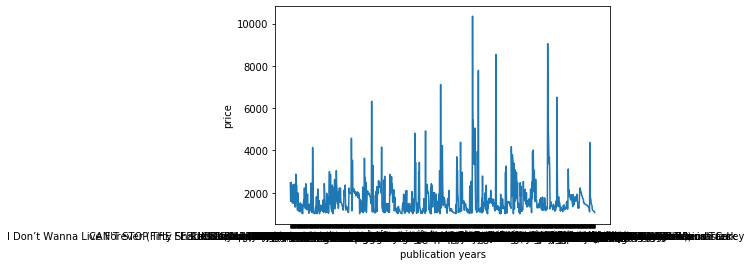

In [256]:
unique = np.array(iceland2['track_name'].unique())
p = [iceland2[iceland2['track_name']==i].loc[:,'streams'].mean() for i in unique]
plt.plot(unique, p)
plt.xlabel('publication years')
plt.ylabel('price')